<a href="https://colab.research.google.com/github/alexmarc55/AI---Homework/blob/main/tema3ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tema 2 - Regresie polinomiala

In [ ]:
import matplotlib.pyplot as plt  # pentru grafice
import numpy as np  # pentru calcul algebric
from sklearn.linear_model import LinearRegression  # algoritmul principal de regresie
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # metrici de evaluare
from sklearn.preprocessing import PolynomialFeatures  # pentru diferitele grade polinomiale

In [ ]:
fertilizator = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]).reshape(-1, 1)
randament = np.array([2.1, 2.8, 3.6, 4.5, 5.2, 5.8, 6.2, 6.4, 6.5, 6.4, 6.2, 5.9, 5.4, 4.8, 4.0]).reshape(-1,1)

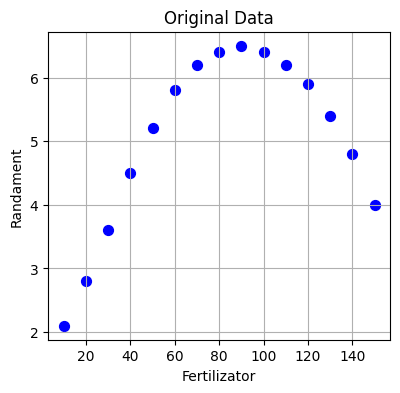

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.scatter(fertilizator, randament, color="blue", s=50)
plt.xlabel("Fertilizator")
plt.ylabel("Randament")
plt.title("Original Data")
plt.grid(True)

In [ ]:
degrees = [1, 2, 3, 4]
models = {}
predictions = {}
x_train, x_test = fertilizator[:12], fertilizator[12:]
y_train, y_test = randament[:12], randament[12:]

In [ ]:
def train(degree):
  poly = PolynomialFeatures(degree = degree)
  x_poly_train = poly.fit_transform(x_train)
  x_poly_test = poly.transform(x_test)

  model = LinearRegression()
  model.fit(x_poly_train, y_train)
  models[degree] = (poly, model)

  y_pred = model.predict(x_poly_train)
  predictions[degree] = y_pred

  mae = mean_absolute_error(y_train, y_pred)
  mse = mean_squared_error(y_train, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_train, y_pred)

  print(f"\n=== Regresie Polinomială Grad {degree} ===")
  print(f"MAE (train):  {mae:.3f}")
  print(f"MSE (train):  {mse:.3f}")
  print(f"RMSE (train): {rmse:.3f}")
  print(f"R² (train):   {r2:.4f}")
  print(f"Coeficienți:  {model.coef_}")
  print(f"Intercept:    {model.intercept_[0]:.3f}")


  fert_range = np.linspace(0, 160, 200).reshape(-1, 1)
  x_poly_range = poly.transform(fert_range)
  y_range = model.predict(x_poly_range)

  # Grafic
  plt.subplot(2, 2, degree)
  plt.scatter(x_train, y_train, color="blue", s=50, label="Train data")
  plt.plot(fert_range, y_range, color="red", linewidth=2, label=f"Degree {degree}")
  plt.xlabel("Fertilizator (kg/ha)")
  plt.ylabel("Randament (tone/ha)")
  plt.title(f"Grad {degree} (R²={r2:.4f})")
  plt.legend()
  plt.grid(True)


=== Regresie Polinomială Grad 1 ===
MAE (train):  0.633
MSE (train):  0.512
RMSE (train): 0.716
R² (train):   0.7618
Coeficienți:  [[0.         0.03706294]]
Intercept:    2.724

=== Regresie Polinomială Grad 2 ===
MAE (train):  0.088
MSE (train):  0.012
RMSE (train): 0.110
R² (train):   0.9943
Coeficienți:  [[ 0.          0.12420579 -0.00067033]]
Intercept:    0.691

=== Regresie Polinomială Grad 3 ===
MAE (train):  0.069
MSE (train):  0.006
RMSE (train): 0.079
R² (train):   0.9971
Coeficienți:  [[ 0.00000000e+00  9.79742480e-02 -1.85481185e-04 -2.48640249e-06]]
Intercept:    1.030

=== Regresie Polinomială Grad 4 ===
MAE (train):  0.021
MSE (train):  0.001
RMSE (train): 0.025
R² (train):   0.9997
Coeficienți:  [[ 0.00000000e+00  3.80283605e-02  1.70367133e-03 -2.44560995e-05
   8.44988345e-08]]
Intercept:    1.558


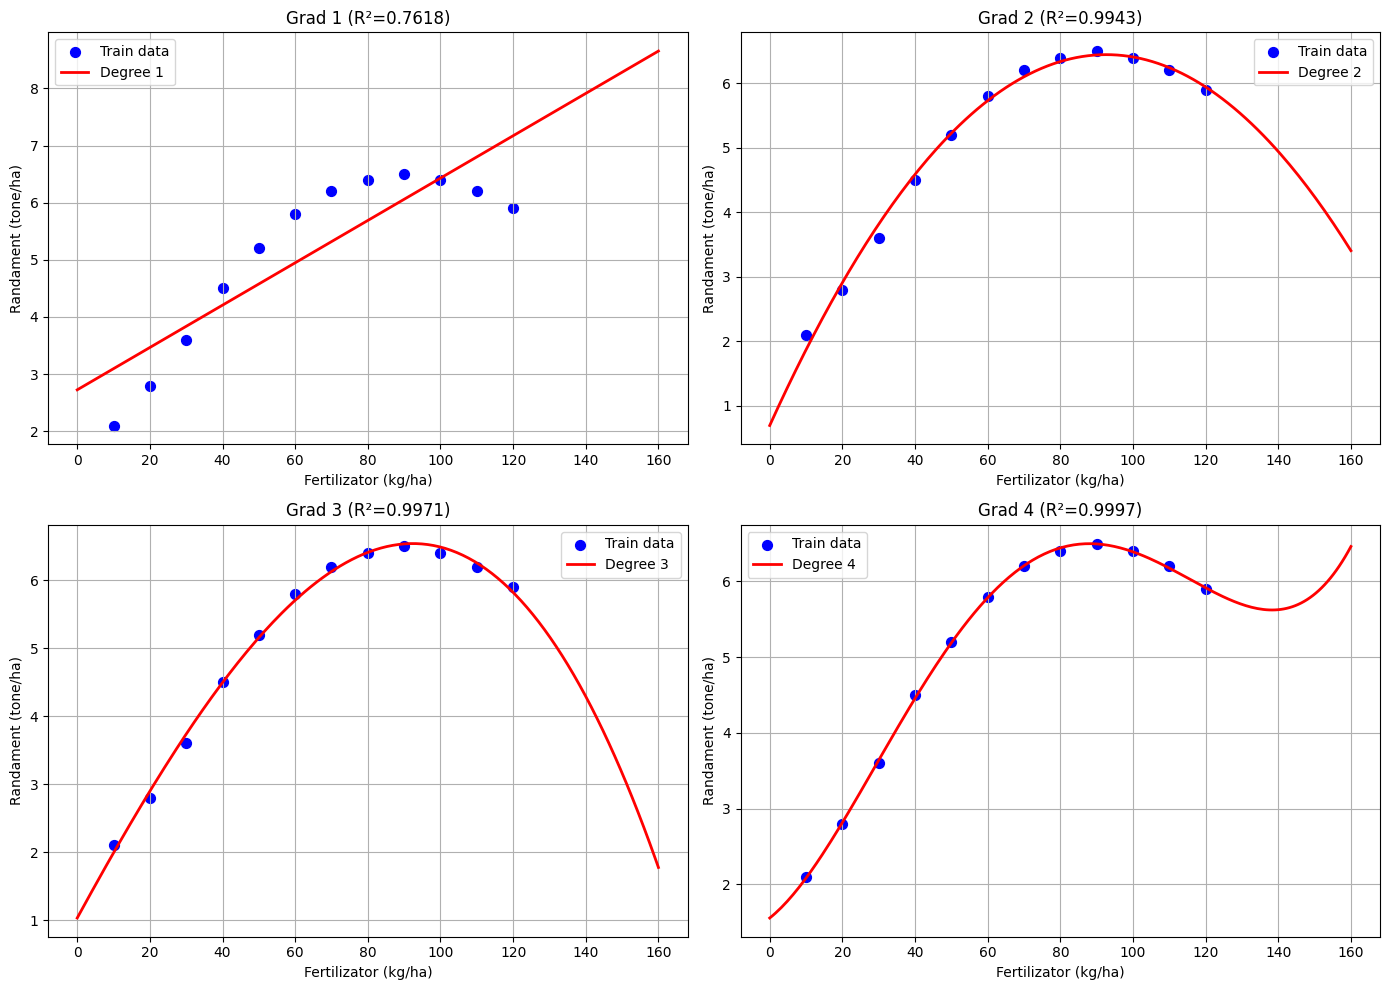

In [ ]:
plt.figure(figsize=(14, 10))
for d in [1, 2, 3, 4]:
    train(d)
plt.tight_layout()
plt.show()

Gradul 2 - surprinde foarte bine forma, cel mai realist

Gradul 3 si 4 - descriu datele perfect, dar perfomanta scade -> overfitting

Problema 2 - Regresia liniara

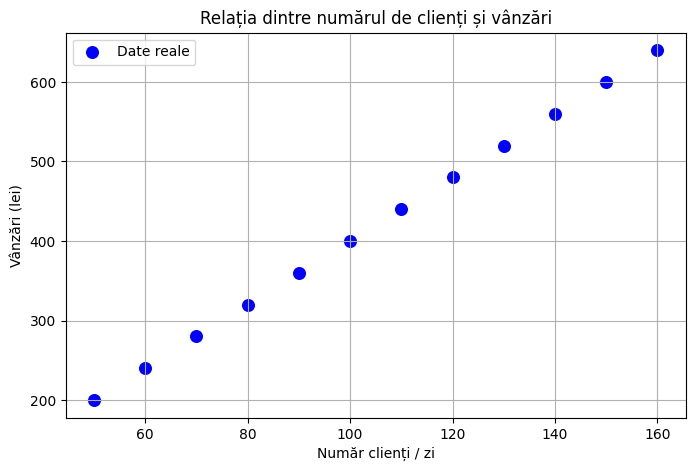

In [ ]:
# Datele oferite
clients = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]).reshape(-1, 1)
sales = np.array([200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640])

plt.figure(figsize=(8,5))
plt.scatter(clients, sales, color='blue', s=70, label='Date reale')
plt.xlabel("Număr clienți / zi")
plt.ylabel("Vânzări (lei)")
plt.title("Relația dintre numărul de clienți și vânzări")
plt.legend()
plt.grid(True)
plt.show()


MAE:  0.00
MSE:  0.00
RMSE: 0.00
R²:   1.0000


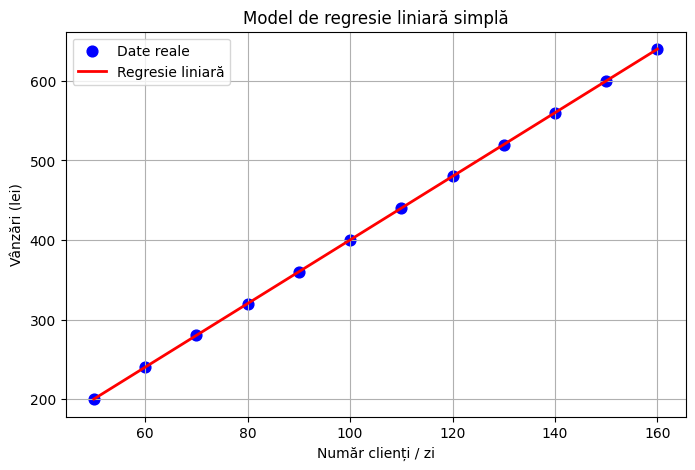

In [ ]:
model = LinearRegression()
model.fit(clients, sales)

sales_pred = model.predict(clients)


mae = mean_absolute_error(sales, sales_pred)
mse = mean_squared_error(sales, sales_pred)
rmse = np.sqrt(mse)
r2 = r2_score(sales, sales_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

plt.figure(figsize=(8,5))
plt.scatter(clients, sales, color='blue', s=60, label="Date reale")
plt.plot(clients, sales_pred, color='red', linewidth=2, label="Regresie liniară")
plt.xlabel("Număr clienți / zi")
plt.ylabel("Vânzări (lei)")
plt.title("Model de regresie liniară simplă")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
new_clients = np.array([[170]])
predicted_sales = model.predict(new_clients)
print(f"Pentru 170 clienți, vânzările estimate sunt: {predicted_sales[0]:.2f} lei")


Pentru 170 clienți, vânzările estimate sunt: 680.00 lei


Modelul simplu liniar se potriveste pt aceste date, nu e cazul de underfitting

Pentru 170 clienti, predictia este buna, dar daca am pune un numar mai mare, modelul nu ar stii cum sa se comporte si ar da o predictie mai putin accurate

Regresia logistica

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression  # algoritmul principal de regresie
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score  # metrici de evaluare
import seaborn as sns  # aspect grafice

In [ ]:
age = np.array([25, 30, 35, 40, 45, 50, 52, 55, 58, 60, 62, 65, 68, 70, 72, 75, 78, 80])
chol = np.array([180, 190, 195, 200, 210, 220, 235, 240, 250, 255, 265, 270, 280, 285, 295, 300, 310, 320])
heart_disease = np.array([0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1])

([<matplotlib.axis.YTick at 0x7fd6f806a5d0>,
 [Text(0, 0, 'Nu'), Text(0, 1, 'Da')])

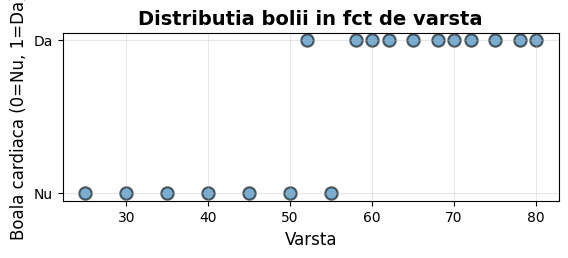

In [ ]:
plt.subplot(2, 1, 2)
plt.scatter(age, heart_disease, s=80, alpha=0.6, edgecolors='black', linewidths=1.5)
plt.xlabel('Varsta', fontsize=12)
plt.ylabel('Boala cardiaca (0=Nu, 1=Da)', fontsize=12)
plt.title('Distributia bolii in fct de varsta', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yticks([0, 1], ['Nu', 'Da'])



([<matplotlib.axis.YTick at 0x7fd6f80e2bd0>,
 [Text(0, 0, 'Nu'), Text(0, 1, 'Da')])

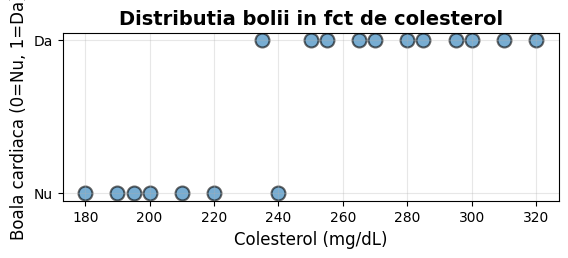

In [ ]:
# Scatter plot Cholesterol vs Heart Disease
plt.subplot(2, 1, 2)
plt.scatter(chol, heart_disease, s=100, alpha=0.6, edgecolors='black', linewidths=1.5)
plt.xlabel('Colesterol (mg/dL)', fontsize=12)
plt.ylabel('Boala cardiaca (0=Nu, 1=Da)', fontsize=12)
plt.title('Distributia bolii in fct de colesterol', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.yticks([0, 1], ['Nu', 'Da'])

In [ ]:
X = np.column_stack((age, chol))
y = heart_disease
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
b0 = model.intercept_[0]
b_age, b_chol = model.coef_[0]

print(f"Model Coefficients:")
print(f"  Intercept (b0): {b0:.4f}")
print(f"  Age coefficient (b_age): {b_age:.4f}")
print(f"  Cholesterol coefficient (b_chol): {b_chol:.4f}")
print("\nModel equation:")
print(f"P(disease) = 1 / (1 + e^(-({b0:.4f} + {b_age:.4f} * age + {b_chol:.4f} * cholesterol)))")


Model Coefficients:
  Intercept (b0): -56.9354
  Age coefficient (b_age): -0.4881
  Cholesterol coefficient (b_chol): 0.3505

Model equation:
P(disease) = 1 / (1 + e^(-(-56.9354 + -0.4881 * age + 0.3505 * cholesterol)))


In [ ]:
# Predictii pt punctele existente
y_pred = model.predict(X)
probabilities = model.predict_proba(X)[:, 1]

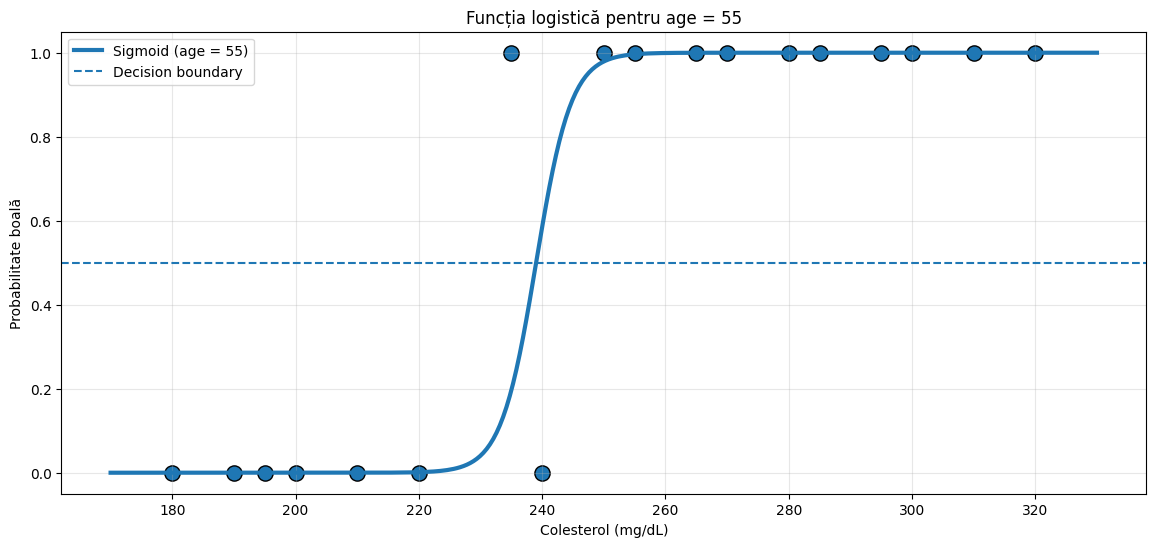

In [ ]:
# Curba deciziei
plt.figure(figsize=(14, 6))

chol_range = np.linspace(170, 330, 300)
age_fixed = 55
X_curve = np.column_stack((np.full_like(chol_range, age_fixed), chol_range))
probs_curve = model.predict_proba(X_curve)[:, 1]

plt.plot(chol_range, probs_curve, linewidth=3, label="Sigmoid (age = 55)")
plt.scatter(chol, heart_disease, s=120, edgecolors='black')
plt.axhline(0.5, linestyle='--', label="Decision boundary")
plt.xlabel("Colesterol (mg/dL)")
plt.ylabel("Probabilitate boală")
plt.title("Funcția logistică pentru age = 55")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


CONFUSION MATRIX

                Predicted
              No(0)   Yes(1)
Actual No         6        1
Actual Yes        0       11


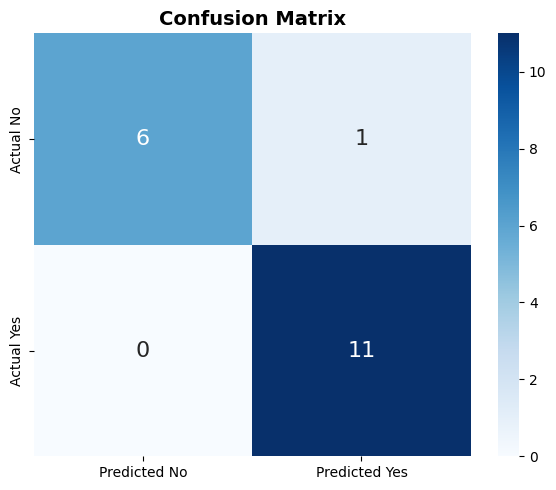

In [ ]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n{'=' * 50}")
print("CONFUSION MATRIX")
print(f"{'=' * 50}")
print(f"\n                Predicted")
print(f"              No(0)   Yes(1)")
print(f"Actual No      {tn:4d}     {fp:4d}")
print(f"Actual Yes     {fn:4d}     {tp:4d}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'],
            annot_kws={"size": 16})
plt.title("Confusion Matrix", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

In [ ]:
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"{'=' * 50}")
print("PERFORMANCE METRICS")
print(f"{'=' * 50}")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-score:  {f1:.4f}")

PERFORMANCE METRICS
Accuracy:  0.9444
Precision: 0.9167
Recall:    1.0000
F1-score:  0.9565


In [ ]:
# Predictie noua
new_data = np.array([[55, 260]])
prob_new = model.predict_proba(new_data)[0, 1]
pred_new = model.predict(new_data)[0]

print(f"{'=' * 50}")
print("PREDICTION FOR Age=55, Chol=260")
print(f"{'=' * 50}")
print(f"Probability of disease: {prob_new:.4f} ({prob_new*100:.2f}%)")
print(f"Prediction: {'Disease (1)' if pred_new == 1 else 'No disease (0)'}")

PREDICTION FOR Age=55, Chol=260
Probability of disease: 0.9994 (99.94%)
Prediction: Disease (1)


In [ ]:
print(f"{'=' * 50}")
print("FEATURE IMPORTANCE")
print(f"{'=' * 50}")
print(f"Age importance:        {abs(b_age):.4f}")
print(f"Cholesterol importance:{abs(b_chol):.4f}")

if abs(b_chol) > abs(b_age):
    print("\nColesterolul influenteaza mai mult modelul")
else:
    print("\nVarsta influenteaza mai mult modelul")

FEATURE IMPORTANCE
Age importance:        0.4881
Cholesterol importance:0.3505

Varsta influenteaza mai mult modelul


Clasificator Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import CategoricalNB  # algoritmul Naive Bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [ ]:
# Dataset
data = {
    'Free':   ['Da', 'Da', 'Nu', 'Da', 'Nu', 'Da', 'Nu', 'Nu', 'Da', 'Nu', 'Da', 'Nu', 'Da', 'Nu', 'Nu', 'Da', 'Nu', 'Da', 'Nu', 'Nu'],
    'Money':  ['Da', 'Da', 'Nu', 'Nu', 'Nu', 'Da', 'Da', 'Nu', 'Da', 'Nu', 'Nu', 'Nu', 'Da', 'Da', 'Nu', 'Da', 'Nu', 'Nu', 'Nu', 'Nu'],
    'Winner': ['Da', 'Nu', 'Nu', 'Da', 'Nu', 'Da', 'Nu', 'Nu', 'Da', 'Da', 'Nu', 'Nu', 'Da', 'Da', 'Nu', 'Nu', 'Nu', 'Da', 'Da', 'Nu'],
    'Link':   ['Da', 'Da', 'Nu', 'Da', 'Da', 'Da', 'Da', 'Nu', 'Nu', 'Nu', 'Da', 'Nu', 'Da', 'Da', 'Da', 'Da', 'Nu', 'Da', 'Nu', 'Nu'],
    'Spam':   ['Da', 'Da', 'Nu', 'Da', 'Nu', 'Da', 'Da', 'Nu', 'Da', 'Nu', 'Da', 'Nu', 'Da', 'Da', 'Nu', 'Da', 'Nu', 'Da', 'Da', 'Nu']
}

df = pd.DataFrame(data)

# 1. ÎMPĂRȚIRE DATE (Train: primele 16, Test: ultimele 4)
train_df = df.iloc[:16]
test_df = df.iloc[16:]

print("=" * 60)
print("DATASET SPLIT")
print("=" * 60)
print(f"Total instances: {len(df)}")
print(f"Training set:    {len(train_df)} instances")
print(f"Testing set:     {len(test_df)} instances")
print("\nPrimele 5 linii din setul de antrenament:")
print(train_df.head().to_string(index=False))

DATASET SPLIT
Total instances: 20
Training set:    16 instances
Testing set:     4 instances

Primele 5 linii din setul de antrenament:
Free Money Winner Link Spam
  Da    Da     Da   Da   Da
  Da    Da     Nu   Da   Da
  Nu    Nu     Nu   Nu   Nu
  Da    Nu     Da   Da   Da
  Nu    Nu     Nu   Da   Nu


In [ ]:
# Calcul manual al datelor
print(f"\n{'=' * 60}")
print("MANUAL CALCULATION (Based on Training Data)")
print(f"{'=' * 60}")

spam_da = train_df[train_df['Spam'] == 'Da']
spam_nu = train_df[train_df['Spam'] == 'Nu']
total_train = len(train_df)

print(f"Class distribution (Train):")
print(f"  Spam = Da: {len(spam_da)} instances")
print(f"  Spam = Nu: {len(spam_nu)} instances")

# Calcul prior probabilities
p_spam_da = len(spam_da) / total_train
p_spam_nu = len(spam_nu) / total_train

print(f"\n1. PRIOR PROBABILITIES:")
print(f"   P(Spam=Da) = {len(spam_da)}/{total_train} = {p_spam_da:.4f}")
print(f"   P(Spam=Nu) = {len(spam_nu)}/{total_train} = {p_spam_nu:.4f}")

# Definim noua instanță
new_instance = {
    'Free': 'Da',
    'Money': 'Nu',
    'Winner': 'Da',
    'Link': 'Da'
}

print(f"\n2. NEW INSTANCE TO CLASSIFY:")
for key, value in new_instance.items():
    print(f"   {key}: {value}")


MANUAL CALCULATION (Based on Training Data)
Class distribution (Train):
  Spam = Da: 10 instances
  Spam = Nu: 6 instances

1. PRIOR PROBABILITIES:
   P(Spam=Da) = 10/16 = 0.6250
   P(Spam=Nu) = 6/16 = 0.3750

2. NEW INSTANCE TO CLASSIFY:
   Free: Da
   Money: Nu
   Winner: Da
   Link: Da


In [ ]:
print(f"\n3. CONDITIONAL PROBABILITIES for Spam=Da (Positive Class):")
# Din emailurile care SUNT Spam (10 instanțe în train set)
p_free_da_spam   = len(spam_da[spam_da['Free'] == 'Da']) / len(spam_da)
p_money_nu_spam  = len(spam_da[spam_da['Money'] == 'Nu']) / len(spam_da)
p_winner_da_spam = len(spam_da[spam_da['Winner'] == 'Da']) / len(spam_da)
p_link_da_spam   = len(spam_da[spam_da['Link'] == 'Da']) / len(spam_da)

print(f"   P(Free=Da|Spam)   = {len(spam_da[spam_da['Free'] == 'Da'])}/{len(spam_da)} = {p_free_da_spam:.4f}")
print(f"   P(Money=Nu|Spam)  = {len(spam_da[spam_da['Money'] == 'Nu'])}/{len(spam_da)} = {p_money_nu_spam:.4f}")
print(f"   P(Winner=Da|Spam) = {len(spam_da[spam_da['Winner'] == 'Da'])}/{len(spam_da)} = {p_winner_da_spam:.4f}")
print(f"   P(Link=Da|Spam)   = {len(spam_da[spam_da['Link'] == 'Da'])}/{len(spam_da)} = {p_link_da_spam:.4f}")

print(f"\n4. CONDITIONAL PROBABILITIES for Spam=Nu (Negative Class):")
# Din emailurile care NU sunt Spam (6 instanțe în train set)
p_free_da_nospam   = len(spam_nu[spam_nu['Free'] == 'Da']) / len(spam_nu)
p_money_nu_nospam  = len(spam_nu[spam_nu['Money'] == 'Nu']) / len(spam_nu)
p_winner_da_nospam = len(spam_nu[spam_nu['Winner'] == 'Da']) / len(spam_nu)
p_link_da_nospam   = len(spam_nu[spam_nu['Link'] == 'Da']) / len(spam_nu)

print(f"   P(Free=Da|NonSpam)   = {len(spam_nu[spam_nu['Free'] == 'Da'])}/{len(spam_nu)} = {p_free_da_nospam:.4f}")
print(f"   P(Money=Nu|NonSpam)  = {len(spam_nu[spam_nu['Money'] == 'Nu'])}/{len(spam_nu)} = {p_money_nu_nospam:.4f}")
print(f"   P(Winner=Da|NonSpam) = {len(spam_nu[spam_nu['Winner'] == 'Da'])}/{len(spam_nu)} = {p_winner_da_nospam:.4f}")
print(f"   P(Link=Da|NonSpam)   = {len(spam_nu[spam_nu['Link'] == 'Da'])}/{len(spam_nu)} = {p_link_da_nospam:.4f}")


3. CONDITIONAL PROBABILITIES for Spam=Da (Positive Class):
   P(Free=Da|Spam)   = 8/10 = 0.8000
   P(Money=Nu|Spam)  = 2/10 = 0.2000
   P(Winner=Da|Spam) = 6/10 = 0.6000
   P(Link=Da|Spam)   = 9/10 = 0.9000

4. CONDITIONAL PROBABILITIES for Spam=Nu (Negative Class):
   P(Free=Da|NonSpam)   = 0/6 = 0.0000
   P(Money=Nu|NonSpam)  = 6/6 = 1.0000
   P(Winner=Da|NonSpam) = 1/6 = 0.1667
   P(Link=Da|NonSpam)   = 2/6 = 0.3333


In [ ]:
# Aplicam formula lui NB fara smoothing
# Formula: P(Class|X) ∝ P(Class) * P(feat1|Class) * ... * P(featn|Class)
prob_spam_da = p_spam_da * p_free_da_spam * p_money_nu_spam * p_winner_da_spam * p_link_da_spam
prob_spam_nu = p_spam_nu * p_free_da_nospam * p_money_nu_nospam * p_winner_da_nospam * p_link_da_nospam

print(f"\n5. NAIVE BAYES CALCULATION:")
print(f"   P(Spam|X) ∝ {p_spam_da:.2f} * {p_free_da_spam:.2f} * {p_money_nu_spam:.2f} * {p_winner_da_spam:.2f} * {p_link_da_spam:.2f}")
print(f"             = {prob_spam_da:.6f}")
print(f"\n   P(NonSpam|X) ∝ {p_spam_nu:.2f} * {p_free_da_nospam:.2f} * {p_money_nu_nospam:.2f} * {p_winner_da_nospam:.2f} * {p_link_da_nospam:.2f}")
print(f"                = {prob_spam_nu:.6f}")

total_prob = prob_spam_da + prob_spam_nu
if total_prob == 0:
    total_prob = 1

prob_da_norm = prob_spam_da / total_prob
prob_nu_norm = prob_spam_nu / total_prob

print(f"\n6. PREDICTION (Manual):")
print(f"   P(Spam=Da|X) = {prob_da_norm:.4f} ({prob_da_norm * 100:.2f}%)")
print(f"   P(Spam=Nu|X) = {prob_nu_norm:.4f} ({prob_nu_norm * 100:.2f}%)")
print(f"   Result: {'SPAM' if prob_da_norm > prob_nu_norm else 'NOT SPAM'}")


5. NAIVE BAYES CALCULATION:
   P(Spam|X) ∝ 0.62 * 0.80 * 0.20 * 0.60 * 0.90
             = 0.054000

   P(NonSpam|X) ∝ 0.38 * 0.00 * 1.00 * 0.17 * 0.33
                = 0.000000

6. PREDICTION (Manual):
   P(Spam=Da|X) = 1.0000 (100.00%)
   P(Spam=Nu|X) = 0.0000 (0.00%)
   Result: SPAM


In [ ]:
# Folosim sklearn
print(f"\n{'=' * 60}")
print("SKLEARN IMPLEMENTATION & METRICS")
print(f"{'=' * 60}")

# Encoding
le_dict = {}
df_encoded = df.copy()
for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    le_dict[column] = le

X = df_encoded.drop('Spam', axis=1)
y = df_encoded['Spam']

X_train = X.iloc[:16].values
y_train = y.iloc[:16].values
X_test = X.iloc[16:].values
y_test = y.iloc[16:].values

# Antrenare Model
nb_model = CategoricalNB(alpha=1.0) # alpha=1.0 este Laplace Smoothing
nb_model.fit(X_train, y_train)

y_pred_train = nb_model.predict(X_train)
y_pred_test = nb_model.predict(X_test)

# PRed pt instanta noua
new_inst_encoded = []
for col in ['Free', 'Money', 'Winner', 'Link']:
    val = le_dict[col].transform([new_instance[col]])[0]
    new_inst_encoded.append(val)

new_pred_prob = nb_model.predict_proba([new_inst_encoded])[0]
new_pred_class = le_dict['Spam'].inverse_transform(nb_model.predict([new_inst_encoded]))[0]

print(f"New Instance Prediction (Sklearn): {new_pred_class}")
print(f"Probabilities: Not Spam={new_pred_prob[0]:.4f}, Spam={new_pred_prob[1]:.4f}")

def print_metrics(y_true, y_pred, set_name):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    print(f"\n--- {set_name} SET METRICS ---")
    print(f"Accuracy:  {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall:    {rec:.2f}")
    print(f"F1 Score:  {f1:.2f}")
    return cm

cm_train = print_metrics(y_train, y_pred_train, "TRAINING")
cm_test = print_metrics(y_test, y_pred_test, "TESTING")


SKLEARN IMPLEMENTATION & METRICS
New Instance Prediction (Sklearn): Da
Probabilities: Not Spam=0.9368, Spam=0.0632

--- TRAINING SET METRICS ---
Accuracy:  1.00
Precision: 1.00
Recall:    1.00
F1 Score:  1.00

--- TESTING SET METRICS ---
Accuracy:  0.75
Precision: 0.67
Recall:    1.00
F1 Score:  0.80


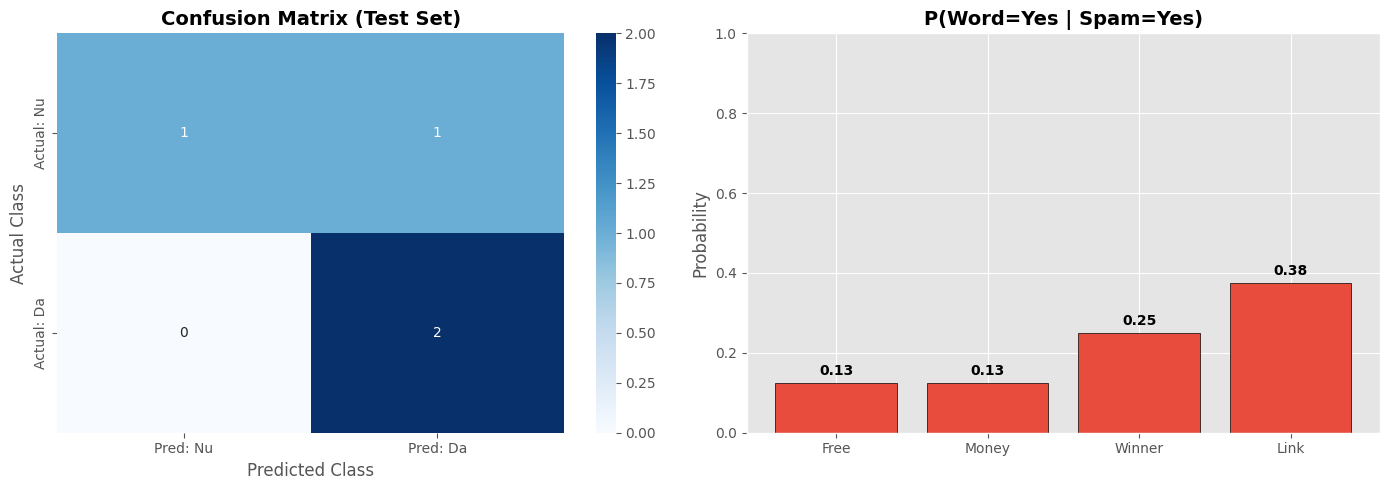

In [ ]:
# Confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Confusion Matrix (Test Set)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Pred: Nu', 'Pred: Da'],
            yticklabels=['Actual: Nu', 'Actual: Da'])
axes[0].set_title('Confusion Matrix (Test Set)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Actual Class')
axes[0].set_xlabel('Predicted Class')

# 2. Feature Importance
# La CategoricalNB, feature_log_prob_ este o listă de array-uri, câte unul pentru fiecare feature
# Vrem să vedem probabilitatea cuvintelor să apară dat fiind că e SPAM (index 1)
feature_names = ['Free', 'Money', 'Winner', 'Link']
spam_class_index = 1 # Indexul pentru 'Da' (Spam)

# Extragem probabilitatea (exponențială a log-prob) ca atributul să fie 'Da' (index 0 sau 1 depinde de encoding)
# LabelEncoder sortează alfabetic: Da=0, Nu=1 sau invers?
# Verificăm: 'Da' vine înainte de 'Nu', deci Da=0.
da_index = le_dict['Free'].transform(['Da'])[0]

probs_given_spam = []
for i, feature in enumerate(feature_names):
    # Luăm log prob pentru feature-ul i, clasa Spam, valoarea 'Da'
    log_prob = nb_model.feature_log_prob_[i][spam_class_index][da_index]
    probs_given_spam.append(np.exp(log_prob))

axes[1].bar(feature_names, probs_given_spam, color='#e74c3c', edgecolor='black')
axes[1].set_title('P(Word=Yes | Spam=Yes)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Probability')
axes[1].set_ylim(0, 1)

for i, v in enumerate(probs_given_spam):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
print(f"\n{'=' * 60}")
print("LAPLACE SMOOTHING ANALYSIS")
print(f"{'=' * 60}")
print("Observație critică din datele de antrenament:")
print("În setul de antrenament, pentru clasa Spam='Nu', cuvântul 'Money' apare de 0 ori.")
print(f"Count(Money=Da | Spam=Nu) = {len(spam_nu[spam_nu['Money'] == 'Da'])}")

print("\nFără Smoothing:")
print("P(Money=Da | Spam=Nu) = 0 / 6 = 0.0")
print("Orice email care conține 'Money' ar avea probabilitatea P(Nu|X) = 0 instantaneu.")

print("\nCu Laplace Smoothing (Formula): (count + alpha) / (total_class + alpha * n_categories)")
n_money_da_spam_nu = 0
n_total_spam_nu = 6
alpha = 1
n_categories = 2 # Da/Nu

p_smoothed = (n_money_da_spam_nu + alpha) / (n_total_spam_nu + alpha * n_categories)
print(f"P_smoothed(Money=Da | Spam=Nu) = (0 + 1) / (6 + 1*2) = 1/8 = {p_smoothed:.4f}")
print("\nAcest lucru permite modelului să nu descalifice total posibilitatea ca un email cu 'Money'")
print("să fie legitim, dacă alte caracteristici sugerează puternic acest lucru.")


LAPLACE SMOOTHING ANALYSIS
Observație critică din datele de antrenament:
În setul de antrenament, pentru clasa Spam='Nu', cuvântul 'Money' apare de 0 ori.
Count(Money=Da | Spam=Nu) = 0

Fără Smoothing:
P(Money=Da | Spam=Nu) = 0 / 6 = 0.0
Orice email care conține 'Money' ar avea probabilitatea P(Nu|X) = 0 instantaneu.

Cu Laplace Smoothing (Formula): (count + alpha) / (total_class + alpha * n_categories)
P_smoothed(Money=Da | Spam=Nu) = (0 + 1) / (6 + 1*2) = 1/8 = 0.1250

Acest lucru permite modelului să nu descalifice total posibilitatea ca un email cu 'Money'
să fie legitim, dacă alte caracteristici sugerează puternic acest lucru.
